# Validation data visualization examples

## Draw 3D detection box (annotated ground truth data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sys 
import os
sys.path.append('../src/')

from data_utils import *

In [2]:
# https://github.com/alexstaravoitau/KITTI-Dataset/blob/master/kitti-dataset.ipynb
# points == velo_frame

def draw_point_cloud(ax, velo_frame, title=None, axes=[0, 1, 2], point_size=0.1, xlim3d=None, ylim3d=None, zlim3d=None):
        """
        Convenient method for drawing various point cloud projections as a part of frame statistics.
        """
        axes_limits = [
                        [-20, 80], # X axis range
                        [-20, 20], # Y axis range
                        [-3, 3]   # Z axis range
                    ]
        axes_str = ['X', 'Y', 'Z']
        ax.grid(False)

    
        ax.scatter(*np.transpose(velo_frame[:, axes]), s=point_size, c=velo_frame[:, 3], cmap='gray')
        # ax.set_title(title)
        ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
        ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
        if len(axes) > 2:
            ax.set_xlim3d(*axes_limits[axes[0]])
            ax.set_ylim3d(*axes_limits[axes[1]])
            ax.set_zlim3d(*axes_limits[axes[2]])
            ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
        else:
            ax.set_xlim(*axes_limits[axes[0]])
            ax.set_ylim(*axes_limits[axes[1]])
        # User specified limits
        if xlim3d!=None:
            ax.set_xlim3d(xlim3d)
        if ylim3d!=None:
            ax.set_ylim3d(ylim3d)
        if zlim3d!=None:
            ax.set_zlim3d(zlim3d)
        




In [3]:
DATA_PATH = '/home/brwei01/Data/data_tracking/sequences/0000/'

velo_frame = read_point_cloud(os.path.join(DATA_PATH, 'velodyne_points/%06d.bin'%0))

Text(0.5, 0, 'Z-upwards')

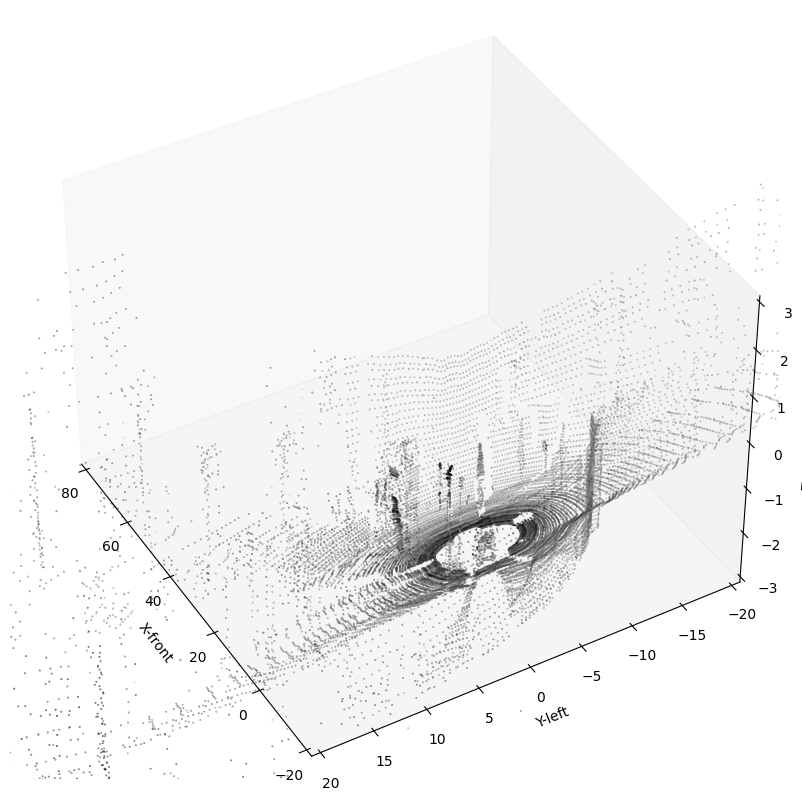

In [4]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(40, 150)
draw_point_cloud(ax, velo_frame[::5])
ax.set_xlabel('X-front')
ax.set_ylabel('Y-left')
ax.set_zlabel('Z-upwards')

Text(0, 0.5, 'Y-left')

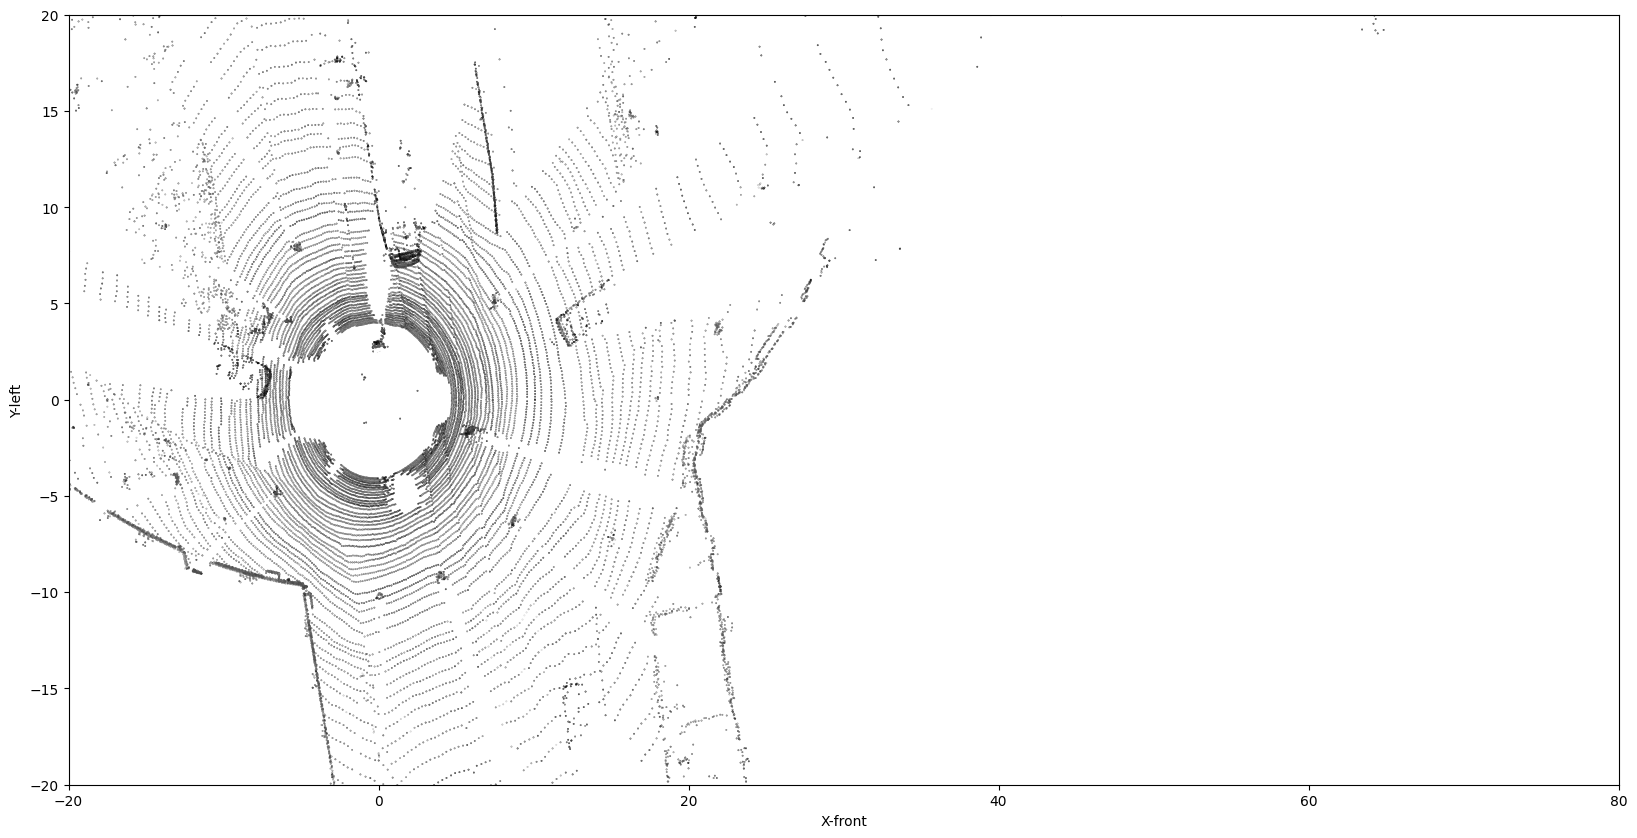

In [5]:
# plot bird view
fig, ax = plt.subplots(figsize=(20,10))
draw_point_cloud(ax, velo_frame[::5], axes=[0,1])
ax.set_xlabel('X-front')
ax.set_ylabel('Y-left')

In [6]:
df_tracking = read_tracking('/home/brwei01/Data/data_tracking/labels/0000.txt')
df_tracking[:20]

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
2,0,0,Car,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
7,1,0,Car,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456
9,1,2,Pedestrian,0,0,-2.530402,1138.342096,160.872449,1223.338201,324.146788,1.714062,0.767881,0.972283,6.352093,1.593046,8.156156,-1.886840
12,2,0,Car,0,0,-1.800343,293.093560,150.470149,449.259225,277.104290,2.000000,1.823255,4.433886,-4.749625,1.675025,13.751675,-2.127642
13,2,1,Cyclist,0,0,-1.933364,752.406083,151.248515,946.562490,374.000000,1.739063,0.824591,1.785241,1.760880,1.605178,5.780931,-1.653453
14,2,2,Pedestrian,0,0,-2.538744,1151.358043,154.633575,1223.691377,324.375836,1.714062,0.767881,0.972283,6.409693,1.533561,7.859055,-1.873436
17,3,0,Car,0,0,-1.803889,291.328036,145.082168,446.400830,269.811515,2.000000,1.823255,4.433886,-4.848295,1.583277,13.922264,-2.133719


## plot 3d detection box

In [7]:
# https://github.com/bostondiditeam/kitti/blob/master/resources/devkit_object/readme.txt

def compute_3d_box_cam2(h,w,l,x,y,z,yaw):
    '''
    Return: 3xn in cam2 coordinates
    '''
    R = np.array([[np.cos(yaw),0,np.sin(yaw)], [0,1,0], [-np.sin(yaw),0,np.cos(yaw)]])
    x_corners = [l/2,l/2,-l/2,-l/2,l/2,l/2,-l/2,-l/2]
    y_corners = [0,0,0,0,-h,-h,-h,-h]
    z_corners = [w/2,-w/2,-w/2,w/2,w/2,-w/2,-w/2,w/2]
    corners_3d_cam2 = np.dot(R, np.vstack([x_corners, y_corners, z_corners]))
    corners_3d_cam2 += np.vstack([x,y,z])
    return corners_3d_cam2

In [8]:
# code from: https://github.com/alexstaravoitau/KITTI-Dataset/blob/master/kitti-dataset.ipynb

def draw_box(pyplot_axis, vertices, axes=[0, 1, 2], color='black'):
    """
    Draws a bounding 3D box in a pyplot axis.
    
    Parameters
    ----------
    pyplot_axis : Pyplot axis to draw in.
    vertices    : Array 8 box vertices containing x, y, z coordinates.
    axes        : Axes to use. Defaults to `[0, 1, 2]`, e.g. x, y and z axes.
    color       : Drawing color. Defaults to `black`.
    """
    vertices = vertices[axes, :]
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]  # Connections between upper and lower planes
    ]
    for connection in connections:
        pyplot_axis.plot(*vertices[:, connection], c=color, lw=1.0)

In [9]:
# corners_3d_cam2 = compute_3d_box_cam2(*df_tracking.loc[54, ['height','width','length','pos_x','pos_y','pos_z','rot_y']])
corners_3d_cam2 = compute_3d_box_cam2(*df_tracking.loc[7, ['height','width','length','pos_x','pos_y','pos_z','rot_y']])
corners_3d_cam2.shape

(3, 8)

In [10]:
corners_3d_cam2.T

array([[-6.58799354,  1.766774  , 14.99309869],
       [-5.03435694,  1.766774  , 15.94728531],
       [-2.71391646,  1.766774  , 12.16907131],
       [-4.26755306,  1.766774  , 11.21488469],
       [-6.58799354, -0.233226  , 14.99309869],
       [-5.03435694, -0.233226  , 15.94728531],
       [-2.71391646, -0.233226  , 12.16907131],
       [-4.26755306, -0.233226  , 11.21488469]])

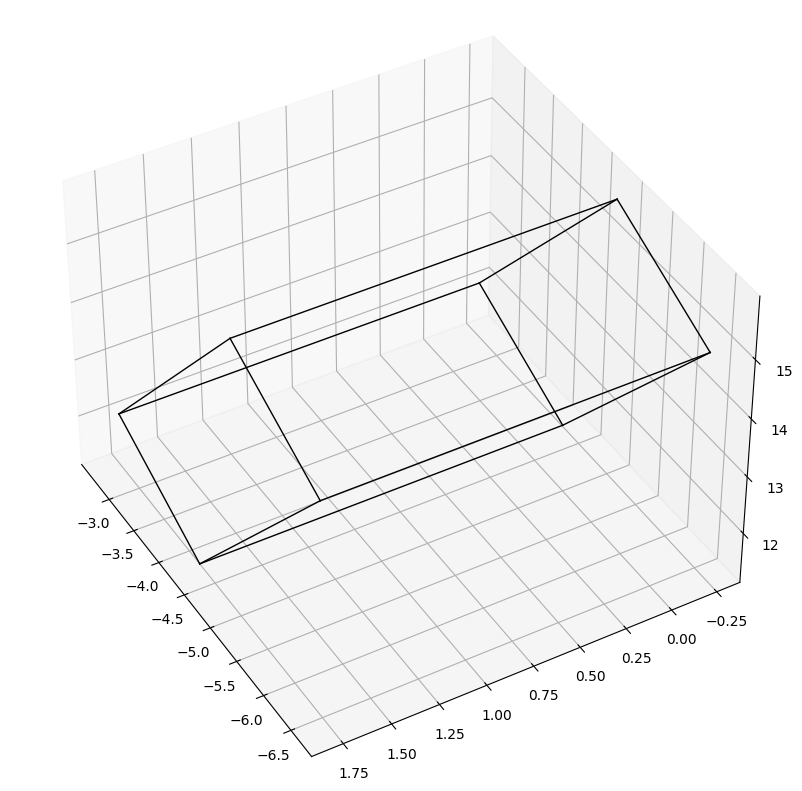

In [11]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40,150)
draw_box(ax, (corners_3d_cam2))

## proejct cam coords to velo coords

In [12]:
from kitti_utils import *

In [13]:
calib = Calibration('/home/brwei01/Data/data_tracking/calibration/0000.txt', from_video=True)

corners_3d_velo = calib.project_rect_to_velo(corners_3d_cam2.T).T #rectify
corners_3d_velo

array([[15.28209937, 16.2365987 , 12.45913557, 11.50463624, 15.26120056,
        16.21569988, 12.43823675, 11.48373742],
       [ 6.60618748,  5.05275634,  2.7319756 ,  4.28540674,  6.58505678,
         5.03162563,  2.71084489,  4.26427603],
       [-1.6125754 , -1.61901471, -1.6830139 , -1.67657458,  0.3872039 ,
         0.38076459,  0.31676541,  0.32320472]])

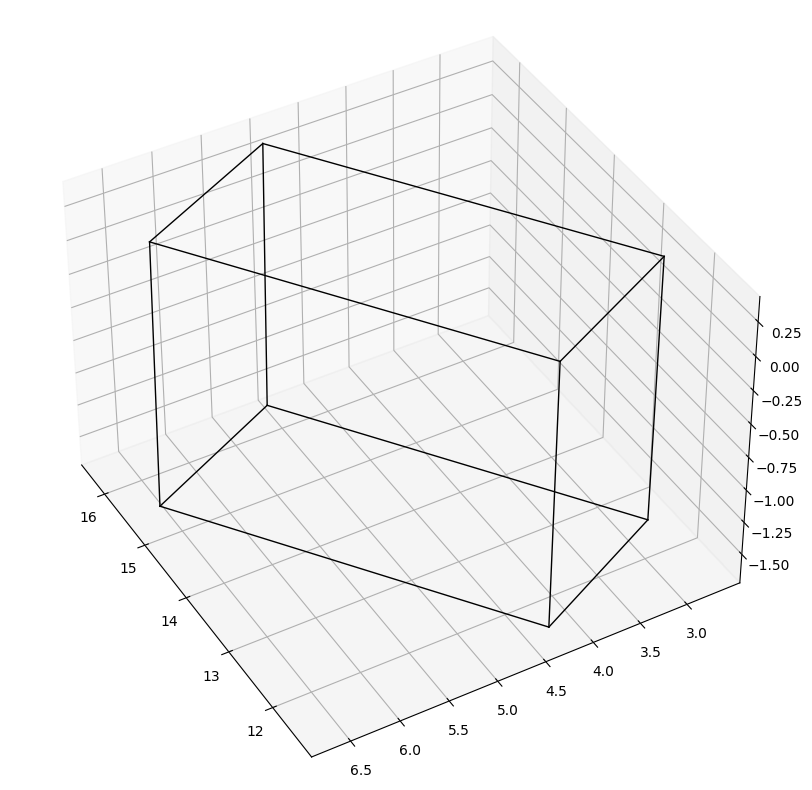

In [14]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(40,150)
draw_box(ax, corners_3d_velo)

## put into point cloud

Text(0.5, 0.5, 'Y-left')

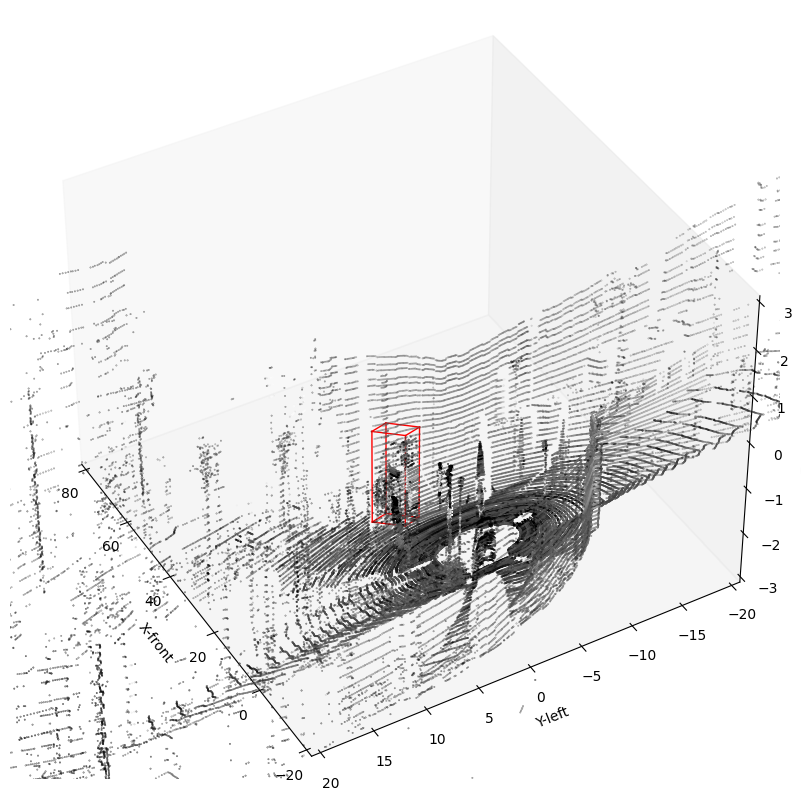

In [15]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(40,150)
# draw_point_cloud(ax, velo_frame[::5])
draw_point_cloud(ax, velo_frame)
draw_box(ax, corners_3d_velo, color='r')
ax.set_xlabel('X-front')
ax.set_ylabel('Y-left')

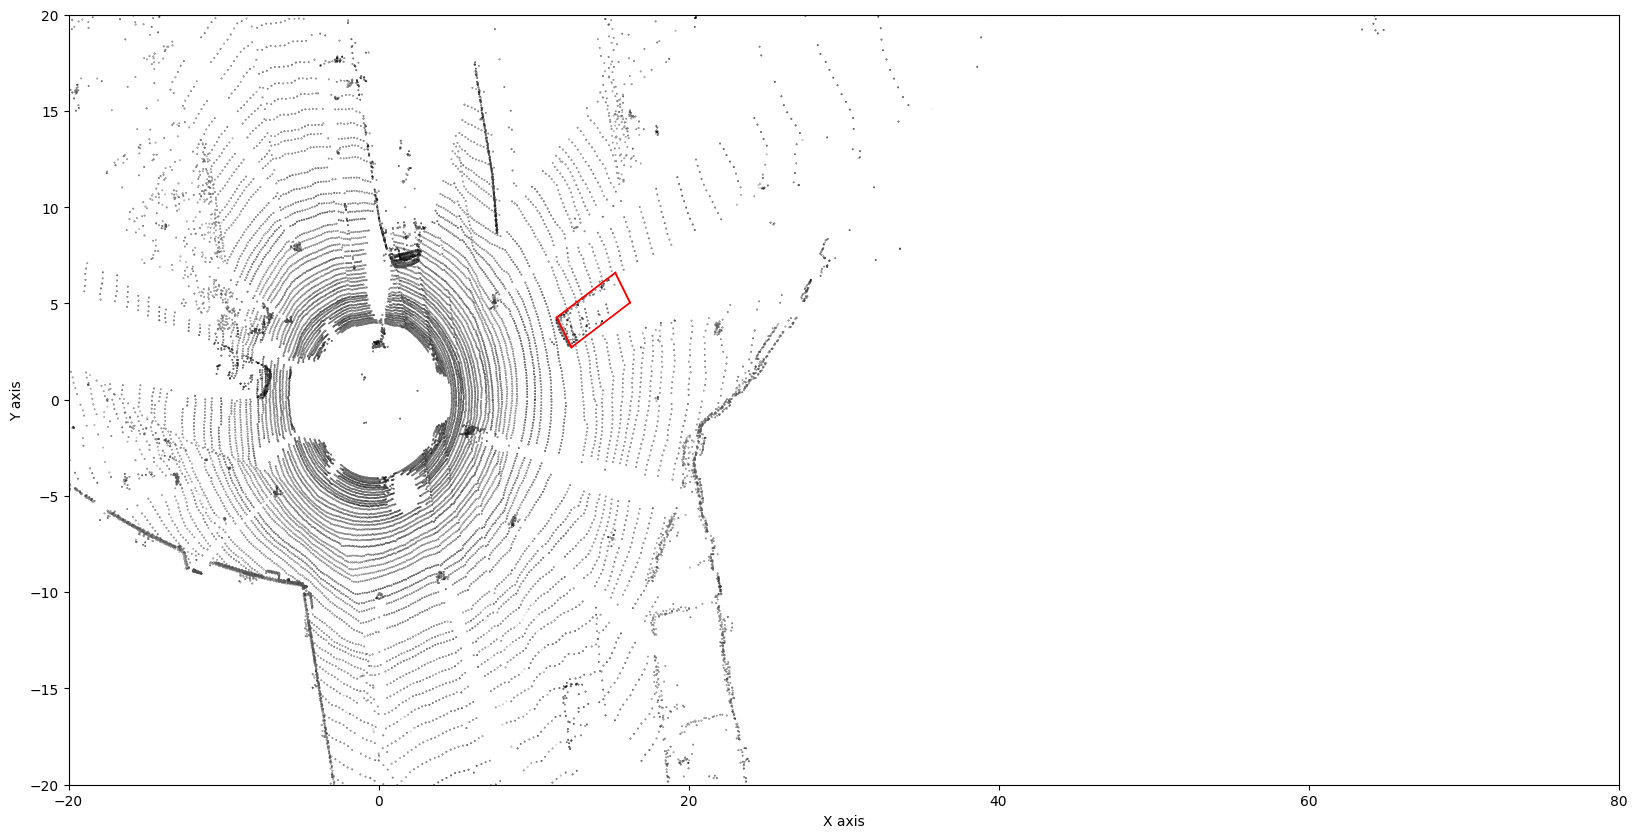

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
draw_point_cloud(ax, velo_frame[::5], axes=[0,1])
# draw_point_cloud(ax, velo_frame, axes=[0,1])
draw_box(ax, corners_3d_velo, axes=[0,1], color='r')

## Calculation 1: From Annotatted bounding box

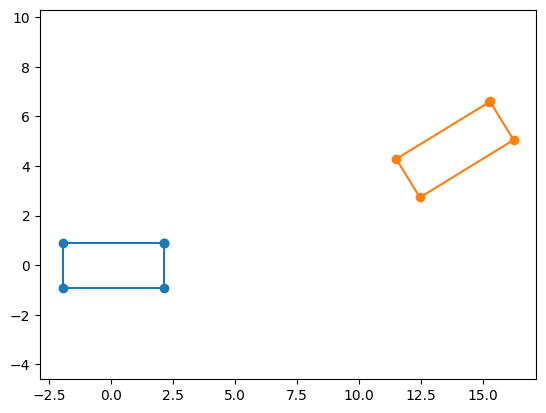

In [17]:
# ego car bbx (4936mm*1912mm)
ego_car_bbx = np.array([[2.15, 0.9, -1.73],[2.15, -0.9, -1.73],[-1.95, -0.9,-1.73],[-1.95,0.9,-1.73],
                        [2.15, 0.9, -0.23],[2.15, -0.9, -0.23],[-1.95, -0.9,-0.23],[-1.95,0.9,-0.23],
                       ])
plt.axes().set_aspect('equal', 'datalim')
plt.plot(ego_car_bbx[:5,0], ego_car_bbx[:5,1], '-o')
plt.plot(corners_3d_velo.T[:5, 0], corners_3d_velo.T[:5, 1], '-o')

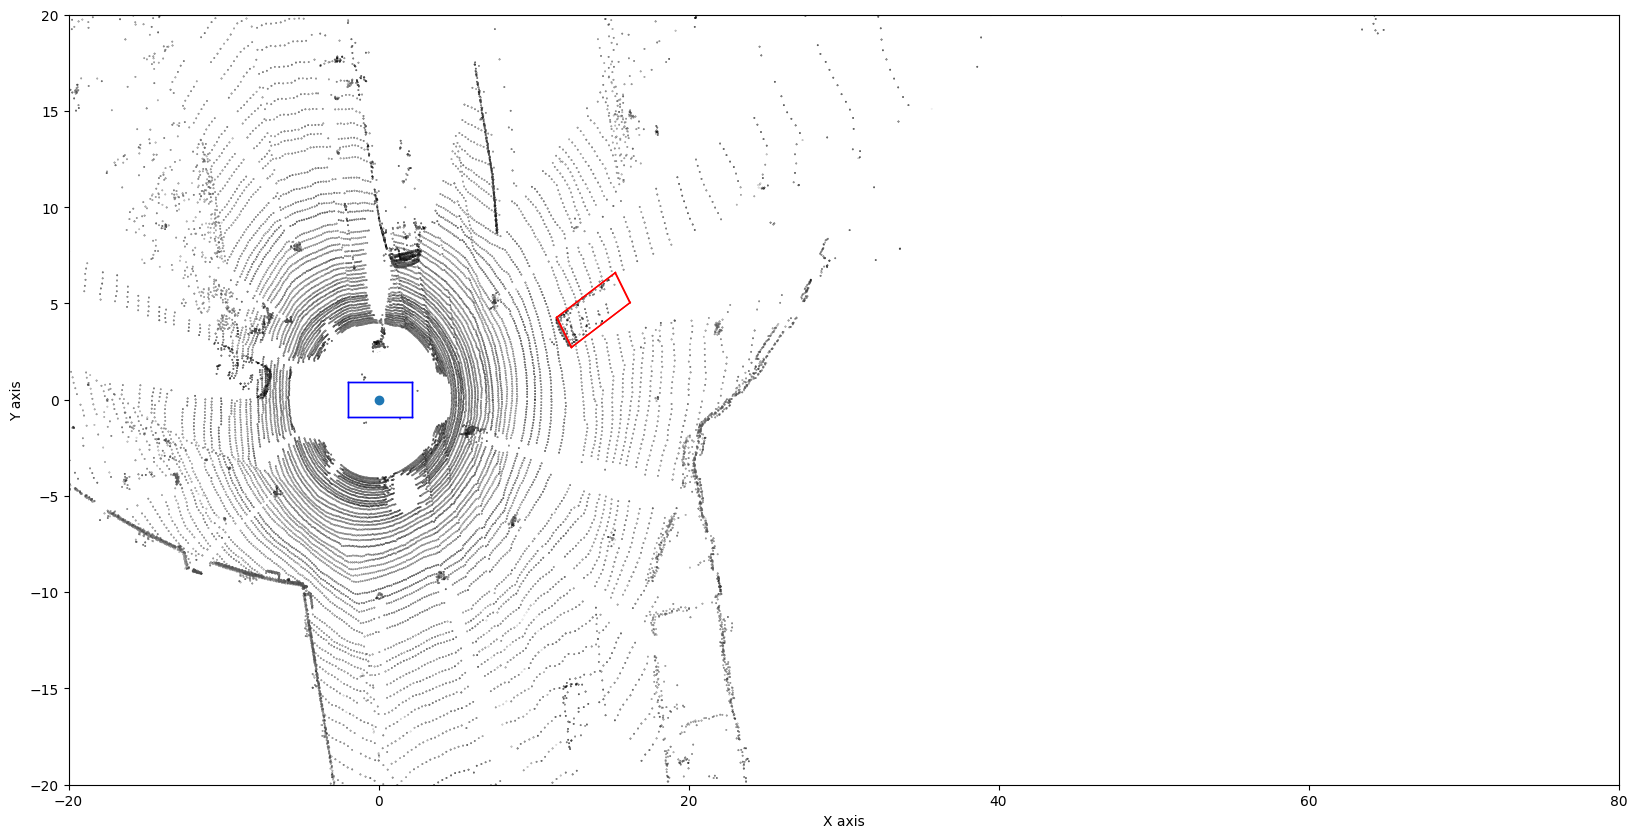

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
draw_point_cloud(ax, velo_frame[::5], axes=[0, 1])
draw_box(ax, corners_3d_velo, axes=[0,1], color='r')
draw_box(ax, ego_car_bbx.T, axes=[0,1],color='b')
ego_car_point = np.array([0.0,0.0,0.0])
plt.plot(ego_car_point[:1], marker='o')

In [19]:
def distance_point_to_segment(P,A,B):
    '''
    Calculates the min distance of a point to a segment AB
    Returns the point Q in AB on which the min distance can be found
    '''
    AP = P-A
    BP = P-B
    AB = B-A
    if np.dot(AB, AP) >= 0 and np.dot(-AB, BP) >= 0:
        return np.abs(np.cross(AP,AB))/np.linalg.norm(AB), np.dot(AP,AB)/np.dot(AB,AB)*AB + A
    d_PA = np.linalg.norm(AP)
    d_PB = np.linalg.norm(BP)
    if d_PA < d_PB:
        return d_PA, A
    return d_PB, B

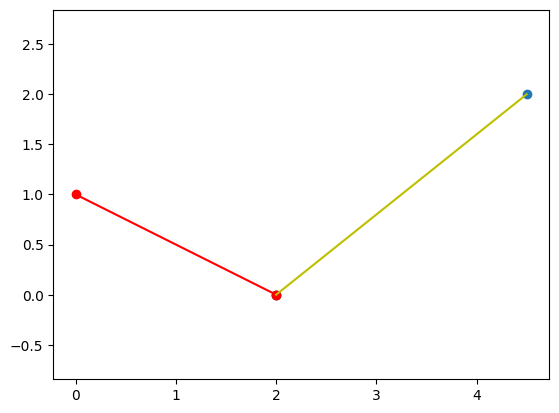

3.2015621187164243

In [20]:
P = np.array([4.5,2], dtype=np.float64)
# try with:
# P = np.array([1, 2], dtype=np.float64)
A = np.array([0,1], dtype=np.float64)
B = np.array([2,0], dtype=np.float64)
d, Q = distance_point_to_segment(P,A,B)

plt.axes().set_aspect('equal','datalim')
plt.scatter(P[0], P[1])
plt.plot(*zip(A, B), 'r-o')
plt.scatter(Q[0], Q[1], c='k')
plt.plot(*zip(P,Q), 'y-')
plt.show()
d

In [21]:
def min_distance_cuboids(cub1, cub2):
    '''
    Computes the minimum distance between two non-overlapping cuboids (3D) of shape(8,3)
    They are projected to BEV and the minimum distance of the two rectangles are return.
    '''
    minD = 1e5
    for i in range(4):
        for j in range(4):
            d, Q = distance_point_to_segment(cub1[i,:2], cub2[j,:2], cub2[j+1,:2])
            if d < minD:
                minD = d
                minP = cub1[i, :2]
                minQ = Q
    for i in range(4):
        for j in range(4):
            d, Q = distance_point_to_segment(cub2[i,:2], cub1[j,:2], cub1[j+1,:2])
            if d < minD:
                minD = d
                minP = cub2[i, :2]
                minQ = Q
    
    return minP, minQ, minD

In [22]:
ego_car_bbx, corners_3d_velo.T

(array([[ 2.15,  0.9 , -1.73],
        [ 2.15, -0.9 , -1.73],
        [-1.95, -0.9 , -1.73],
        [-1.95,  0.9 , -1.73],
        [ 2.15,  0.9 , -0.23],
        [ 2.15, -0.9 , -0.23],
        [-1.95, -0.9 , -0.23],
        [-1.95,  0.9 , -0.23]]),
 array([[15.28209937,  6.60618748, -1.6125754 ],
        [16.2365987 ,  5.05275634, -1.61901471],
        [12.45913557,  2.7319756 , -1.6830139 ],
        [11.50463624,  4.28540674, -1.67657458],
        [15.26120056,  6.58505678,  0.3872039 ],
        [16.21569988,  5.03162563,  0.38076459],
        [12.43823675,  2.71084489,  0.31676541],
        [11.48373742,  4.26427603,  0.32320472]]))

9.948376652355863


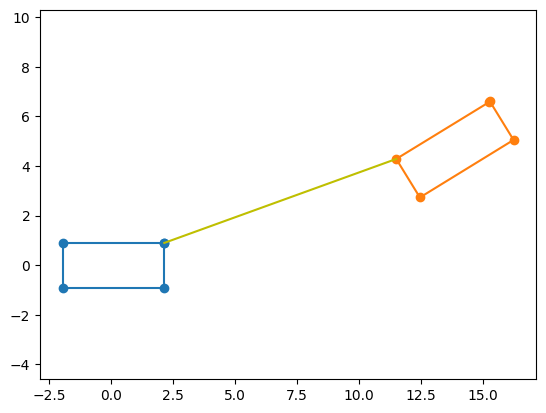

In [23]:
plt.axes().set_aspect('equal', 'datalim')
plt.plot(ego_car_bbx[:5, 0], ego_car_bbx[:5, 1],'-o')
plt.plot(corners_3d_velo.T[:5, 0], corners_3d_velo.T[:5, 1], '-o')
minP, minQ, minD = min_distance_cuboids(ego_car_bbx, corners_3d_velo.T)
plt.plot(*zip(minP, minQ), 'y-')
print(minD)

## Calculation 2: 2D point in polygon

POLYGON ((2.15 0.9, 2.15 -0.9, -1.95 -0.9, -1.95 0.9, 2.15 0.9))


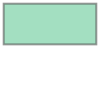

In [24]:
import shapely
from shapely import Point, Polygon

ego_car_bbx = np.array([[2.15, 0.9, -1.73],[2.15, -0.9, -1.73],[-1.95, -0.9,-1.73],[-1.95,0.9,-1.73],
                        [2.15, 0.9, -0.23],[2.15, -0.9, -0.23],[-1.95, -0.9,-0.23],[-1.95,0.9,-0.23],
                       ])
ego_car_point = np.array([0,0,0])
ego_car_bbx_2d_coords = ego_car_bbx[:5,:2]
ego_car_bbx_2d = Polygon(ego_car_bbx_2d_coords)
print(ego_car_bbx_2d)
ego_car_bbx_2d

POLYGON ((15.282099373677648 6.606187484110101, 16.23659870227772 5.052756342051033, 12.459135569776338 2.7319756004773126, 11.504636241176268 4.28540674253638, 15.261200556187573 6.585056775531252, 15.282099373677648 6.606187484110101))


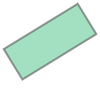

In [25]:
corners_2d_velo_coords = corners_3d_velo.T[:5,:2]
box_2d_pcl = Polygon(corners_2d_velo_coords)
print(box_2d_pcl)
box_2d_pcl

In [26]:
points_in_box = []
for point_coords in velo_frame[::5][:,:2]:
    point = Point(point_coords)
    if point.within(box_2d_pcl):
        # print(point_coords)
        points_in_box.append(point_coords)

points_in_box = np.array(points_in_box)  # Convert the list of points to a NumPy array
points_in_box

array([[12.354,  3.113],
       [12.246,  3.271],
       [12.157,  3.432],
       [12.046,  3.606],
       [11.955,  3.764],
       [11.872,  3.923],
       [11.788,  4.102],
       [12.376,  4.502],
       [13.38 ,  3.564],
       [14.037,  3.954],
       [14.818,  4.529],
       [14.758,  4.74 ],
       [14.692,  4.949],
       [11.968,  4.301],
       [12.77 ,  4.796],
       [13.831,  5.446],
       [12.619,  3.011],
       [14.426,  4.068],
       [11.734,  4.146],
       [14.307,  5.663],
       [12.593,  2.994],
       [14.429,  4.089],
       [14.203,  4.437],
       [12.874,  4.903],
       [14.404,  5.83 ],
       [12.658,  3.381],
       [13.419,  3.81 ],
       [12.444,  3.768],
       [13.159,  4.187],
       [12.217,  4.123],
       [11.596,  4.18 ],
       [14.422,  5.762],
       [12.522,  2.878],
       [12.758,  3.251],
       [12.533,  3.383],
       [13.435,  3.879],
       [12.403,  3.834],
       [13.115,  4.26 ],
       [11.673,  4.095],
       [12.129,  4.493],


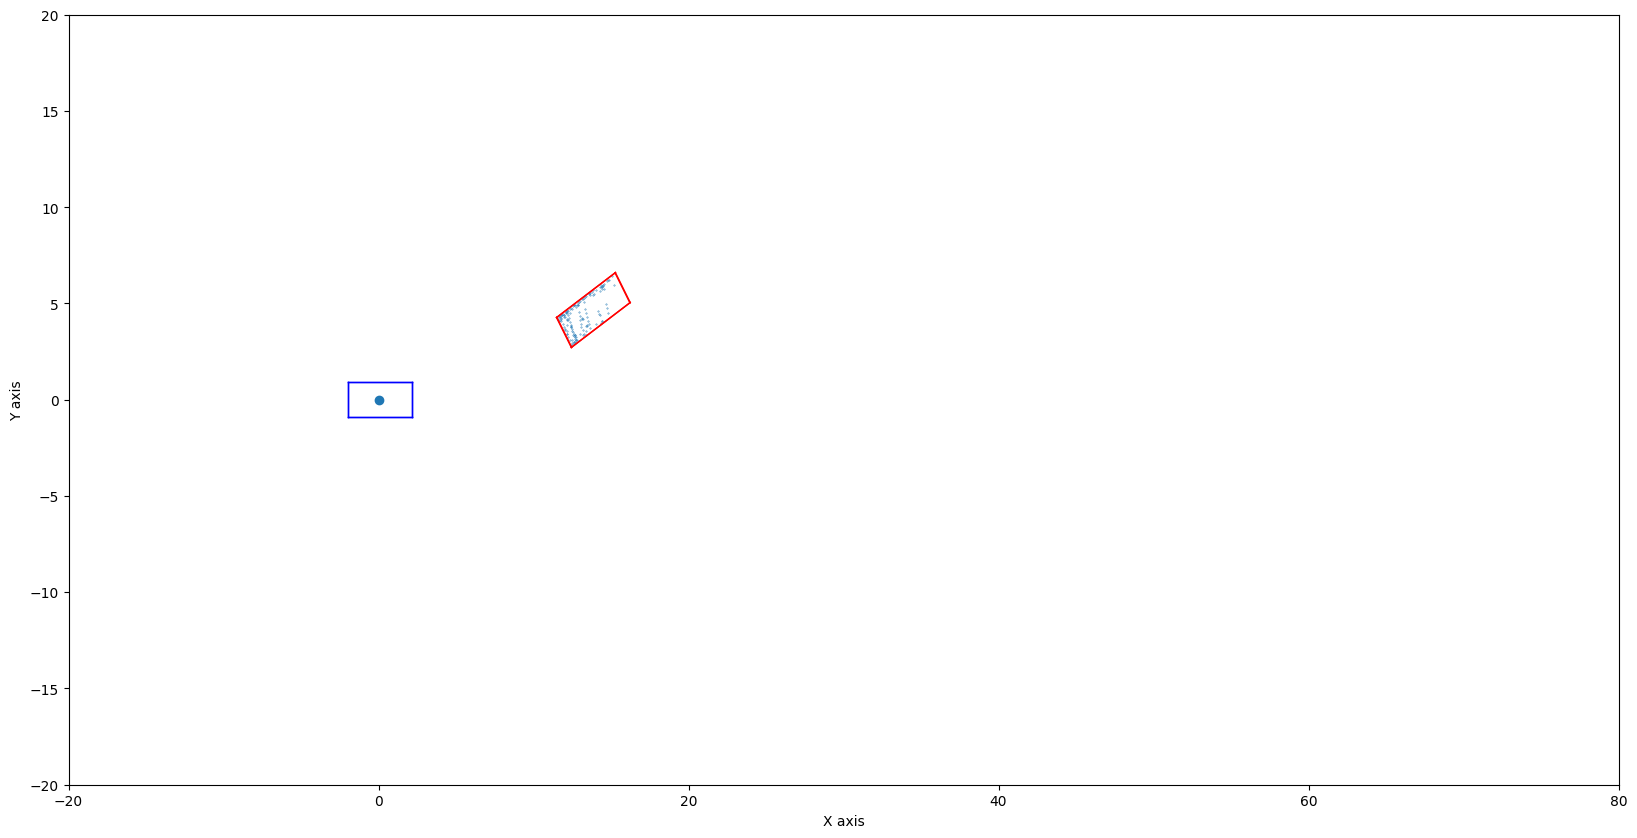

In [150]:
# https://github.com/alexstaravoitau/KITTI-Dataset/blob/master/kitti-dataset.ipynb
# points == velo_frame

def draw_point_cloud(ax, velo_frame, title=None, axes=[0, 1, 2], point_size=0.1, xlim3d=None, ylim3d=None, zlim3d=None):
        """
        Convenient method for drawing various point cloud projections as a part of frame statistics.
        """
        axes_limits = [
                        [-20, 80], # X axis range
                        [-20, 20], # Y axis range
                        [-3, 3]   # Z axis range
                    ]
        axes_str = ['X', 'Y', 'Z']
        ax.grid(False)

    
        ax.scatter(*np.transpose(velo_frame[:, axes]), s=point_size)
        # ax.set_title(title)
        ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
        ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
        if len(axes) > 2:
            ax.set_xlim3d(*axes_limits[axes[0]])
            ax.set_ylim3d(*axes_limits[axes[1]])
            ax.set_zlim3d(*axes_limits[axes[2]])
            ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
        else:
            ax.set_xlim(*axes_limits[axes[0]])
            ax.set_ylim(*axes_limits[axes[1]])
        # User specified limits
        if xlim3d!=None:
            ax.set_xlim3d(xlim3d)
        if ylim3d!=None:
            ax.set_ylim3d(ylim3d)
        if zlim3d!=None:
            ax.set_zlim3d(zlim3d)
        

fig, ax = plt.subplots(figsize=(20,10))
draw_point_cloud(ax, points_in_box, axes=[0, 1])
draw_box(ax, corners_3d_velo, axes=[0,1], color='r')
draw_box(ax, ego_car_bbx.T, axes=[0,1],color='b')
plt.plot(ego_car_point[:1], marker='o')

In [27]:
# Calculate distances
ego_car_point_2d = ego_car_point[:2]
distances = np.linalg.norm(points_in_box - ego_car_point_2d, axis=1)

# Find the index of the point with the shortest distance
index_of_shortest_distance = np.argmin(distances)
shortest_distance = distances[index_of_shortest_distance]
closest_point = points_in_box[index_of_shortest_distance]
closest_point = np.concatenate((closest_point, np.array([0])))

print(f"Shortest distance: {shortest_distance}")
print(f"Closest point: {closest_point}")

Shortest distance: 12.32637854432911
Closest point: [11.59599972  4.17999983  0.        ]


In [28]:
closest_point

array([11.59599972,  4.17999983,  0.        ])

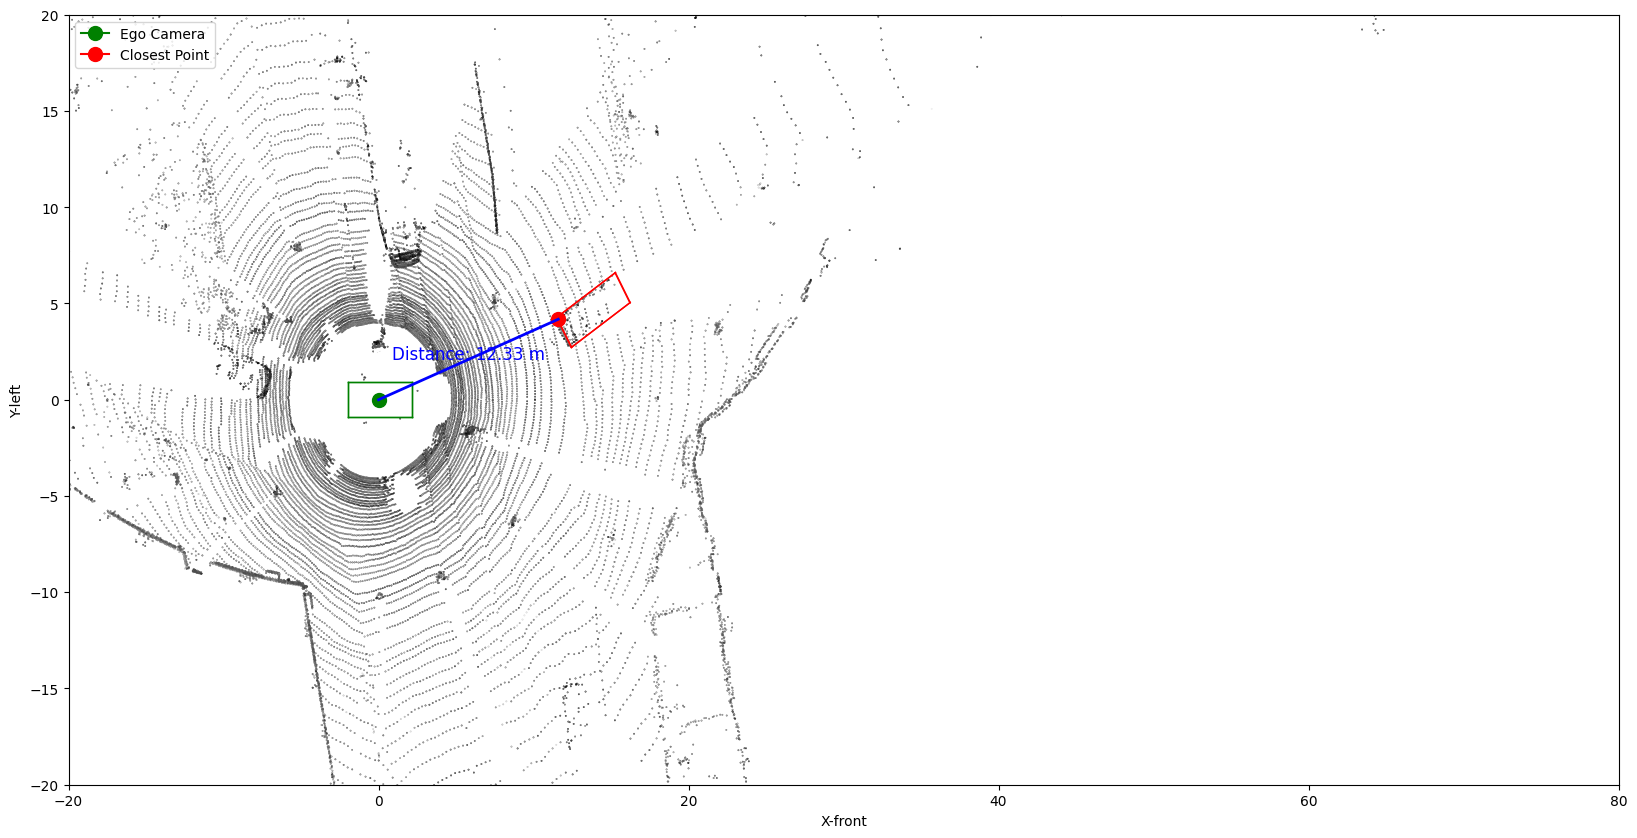

In [36]:
import matplotlib.pyplot as plt

# Assuming you have the following variables defined:
# closest_point: The coordinates of the closest point
# distance_to_closest_point: The distance to the closest point

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the point cloud and boxes (assuming these functions are defined)
draw_point_cloud(ax, velo_frame[::5], axes=[0, 1])
draw_box(ax, corners_3d_velo, axes=[0, 1], color='r')
draw_box(ax, ego_car_bbx.T, axes=[0, 1], color='g')

# Plot the ego_car_point
plt.plot(ego_car_point[0], ego_car_point[1], marker='o', color='g', markersize=10, label='Ego Camera')

# Plot the closest point
plt.plot(closest_point[0], closest_point[1], marker='o', color='r', markersize=10, label='Closest Point')

# Plot the line from ego_car_point to closest_point
plt.plot([ego_car_point[0], closest_point[0]], [ego_car_point[1], closest_point[1]], linestyle='-', color='b', linewidth=2)

# Calculate the midpoint of the line
midpoint_x = (ego_car_point[0] + closest_point[0]) / 2
midpoint_y = (ego_car_point[1] + closest_point[1]) / 2

# Add the distance message directly over the line
plt.annotate(f'Distance: {shortest_distance:.2f} m', xy=(midpoint_x, midpoint_y), ha='center', fontsize=12, color='b')

# Add labels and legend
plt.xlabel('X-front')
plt.ylabel('Y-left')
plt.legend(loc='upper left')

# Show the plot
plt.show()


## Calculation 3: 3D point in polyhedron (Convexhull)

In [128]:
from scipy.spatial import ConvexHull

def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0

In [129]:
hull = corners_3d_velo.T
hull

array([[15.28209937,  6.60618748, -1.6125754 ],
       [16.2365987 ,  5.05275634, -1.61901471],
       [12.45913557,  2.7319756 , -1.6830139 ],
       [11.50463624,  4.28540674, -1.67657458],
       [15.26120056,  6.58505678,  0.3872039 ],
       [16.21569988,  5.03162563,  0.38076459],
       [12.43823675,  2.71084489,  0.31676541],
       [11.48373742,  4.26427603,  0.32320472]])

In [137]:
import numpy as np
import time

# Start measuring time
start_time = time.time()
print("Whole set of points at frame 0")
#print("Sample of every 5th element from whole set")

points_in_box = []

for point in velo_frame[:,:3]:
#for point in velo_frame[::5][:, :3]:
    if in_hull(point, hull):
        points_in_box.append(point)

points_in_box = np.array(points_in_box)  # Convert the list of points to a NumPy array

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time and system information
print(f"Elapsed Time: {elapsed_time:.4f} seconds")

# Print system information
import platform
import os

print("\nSystem Information:")
print(f"Platform: {platform.platform()}")
print(f"Python Version: {platform.python_version()}")
print(f"Processor: {platform.processor()}")
print(f"CPU Cores: {os.cpu_count()}")


Whole set of points at frame 0
Elapsed Time: 46.3650 seconds

System Information:
Platform: Linux-5.15.0-83-generic-x86_64-with-glibc2.29
Python Version: 3.8.10
Processor: x86_64
CPU Cores: 4


In [138]:
points_in_box[:10] 

array([[12.425,  3.048,  0.105],
       [12.391,  3.081,  0.105],
       [12.354,  3.113,  0.106],
       [12.338,  3.151,  0.106],
       [12.325,  3.168,  0.106],
       [12.292,  3.201,  0.106],
       [12.272,  3.237,  0.106],
       [12.246,  3.271,  0.106],
       [12.232,  3.309,  0.106],
       [12.21 ,  3.344,  0.106]], dtype=float32)

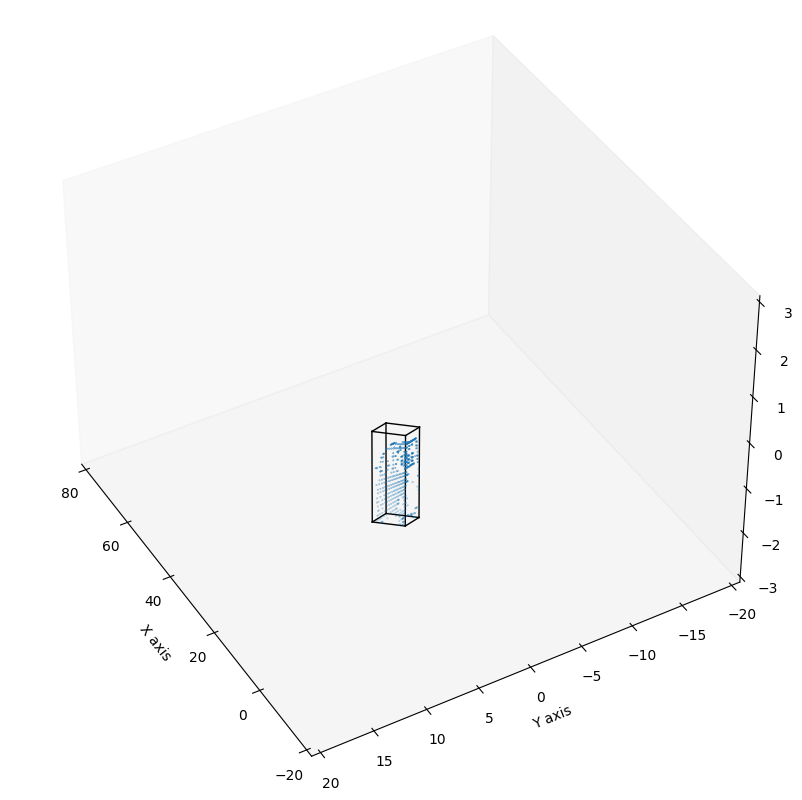

In [139]:
# https://github.com/alexstaravoitau/KITTI-Dataset/blob/master/kitti-dataset.ipynb
# points == velo_frame

def draw_point_cloud(ax, velo_frame, title=None, axes=[0, 1, 2], point_size=0.1, xlim3d=None, ylim3d=None, zlim3d=None):
        """
        Convenient method for drawing various point cloud projections as a part of frame statistics.
        """
        axes_limits = [
                        [-20, 80], # X axis range
                        [-20, 20], # Y axis range
                        [-3, 3]   # Z axis range
                    ]
        axes_str = ['X', 'Y', 'Z']
        ax.grid(False)

    
        ax.scatter(*np.transpose(velo_frame[:, axes]), s=point_size)
        # ax.set_title(title)
        ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
        ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
        if len(axes) > 2:
            ax.set_xlim3d(*axes_limits[axes[0]])
            ax.set_ylim3d(*axes_limits[axes[1]])
            ax.set_zlim3d(*axes_limits[axes[2]])
            ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
        else:
            ax.set_xlim(*axes_limits[axes[0]])
            ax.set_ylim(*axes_limits[axes[1]])
        # User specified limits
        if xlim3d!=None:
            ax.set_xlim3d(xlim3d)
        if ylim3d!=None:
            ax.set_ylim3d(ylim3d)
        if zlim3d!=None:
            ax.set_zlim3d(zlim3d)
        


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(40,150)
draw_point_cloud(ax, points_in_box)
draw_box(ax, corners_3d_velo)

In [52]:
# calculate
ego_point = np.array([[0,0,0]])
ego_point_in_velo = calib.project_rect_to_velo(ego_point)
ego_point_in_velo

# Calculate distances
distances = np.linalg.norm(points_in_box - ego_point_in_velo, axis=1)
# Find the index of the point with the shortest distance
index_of_shortest_distance = np.argmin(distances)
shortest_distance = distances[index_of_shortest_distance]
print(f"Shortest distance: {shortest_distance}")
print(f"Closest point: {points_in_box[index_of_shortest_distance]}")

Shortest distance: 11.9529707868339
Closest point: [11.496  4.023 -0.918]


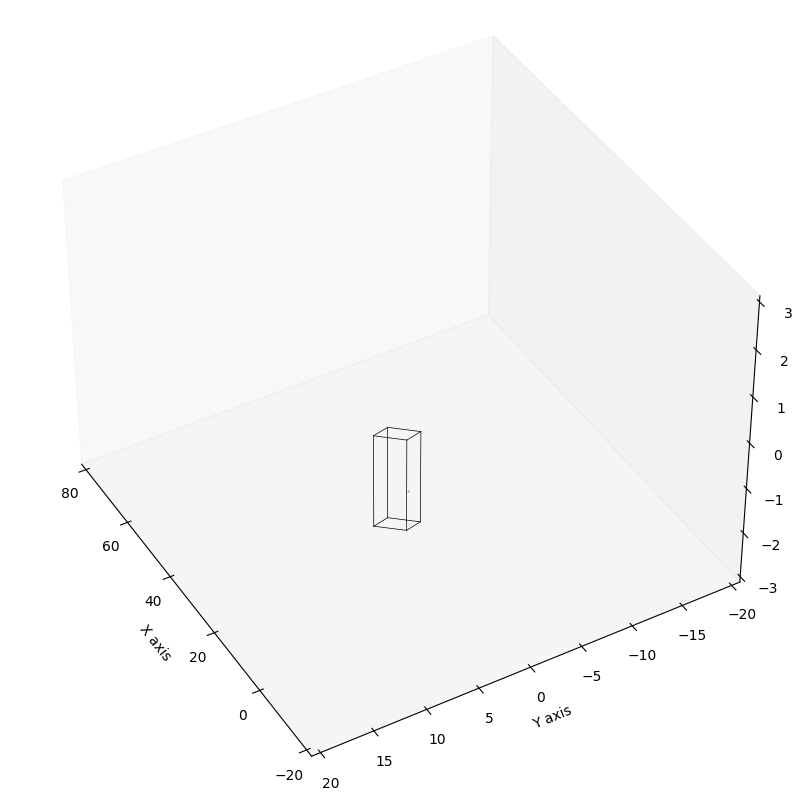

In [55]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(40,150)
draw_point_cloud(ax, np.array([points_in_box[index_of_shortest_distance]]))
draw_box(ax, corners_3d_velo)

In [70]:
from scipy.spatial import ConvexHull, Delaunay

def point_in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)
    return hull.find_simplex(p)>=0

def compute_3d_box_cam2(h,w,l,x,y,z,yaw):
    '''
    Return: 3xn in cam2 coordinates
    https://github.com/bostondiditeam/kitti/blob/master/resources/devkit_object/readme.txt
    '''
    R = np.array([[np.cos(yaw),0,np.sin(yaw)], [0,1,0], [-np.sin(yaw),0,np.cos(yaw)]])
    x_corners = [l/2,l/2,-l/2,-l/2,l/2,l/2,-l/2,-l/2]
    y_corners = [0,0,0,0,-h,-h,-h,-h]
    z_corners = [w/2,-w/2,-w/2,w/2,w/2,-w/2,-w/2,w/2]
    corners_3d_cam2 = np.dot(R, np.vstack([x_corners, y_corners, z_corners]))
    corners_3d_cam2 += np.vstack([x,y,z])
    return corners_3d_cam2

In [ ]:
frame = 0

while frame < 155:
    df_tracking_frame = df_tracking[df_tracking.frame==frame]
    point_cloud = read_point_cloud(os.path.join(DATA_PATH, 'velodyne_points/data/%010d.bin'%frame))
    boxes_3d = np.array(df_tracking_frame[['height','width','length','pos_x','pos_y','pos_z','rot_y']])
    corners_3d_velos = []
    for box_3d in boxes_3d:
        corners_3d_cam2 = compute_3d_box_cam2(*box_3d) # calcualte the corners
        corners_3d_velo = calib.project_rect_to_velo(corners_3d_cam2.T) # convert to velo, 8*3 array
        corners_3d_velos += [corners_3d_velo]
    
        # judge if point in box_3d
        points_in_box = []
        hull = np.array([[box_3d]]).T
        for point in point_cloud[::5][:,:3]:
            if point_in_hull(point, hull):
                points_in_box.append(point)
        
        # calculate the point with shortest distance to ego 
        ego_point = np.array([[0,0,0]])
        ego_point_in_velo = calib.project_rect_to_velo(ego_point)
        ego_point_in_velo
        # Calculate distances
        distances = np.linalg.norm(points_in_box - ego_point_in_velo, axis=1)
        # Find the index of the point with the shortest distance
        index_of_shortest_distance = np.argmin(distances)
        shortest_distance = distances[index_of_shortest_distance]
        print(f"Shortest distance: {shortest_distance}")
        # print(f"Closest point: {points_in_box[index_of_shortest_distance]}")


    frame += 1